### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    1) Which variables are significant in predicting the demand for shared bikes
    2) How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal of the Assignment:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### The steps to be followed in this exercise are as follows:

1) Reading, understanding and visualizing the data

2) Preparing the data for model training (train-test split, rescaling)

3) Training the model

4) Residual analysis

5) Prediction and evaluation of the test set

## Step 1: Reading and Understanding the Data

    1. Importing the required libraries
    2. Understanding the structure of the data

In [1]:
#importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

###### Reading and interpreting the dataset

In [2]:
# read the data
day = pd.read_csv("day.csv")
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
#checking the shape of the dataset 

day.shape

(730, 16)

In [4]:
#checking the info of the dataset 

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#checking the description of the dataset

day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [6]:
#checking for null values

day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# removing unnecessary column
day = day.drop(['instant', 'dteday'], axis=1)
day.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [8]:
day.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.544807    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
max      3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [9]:
# Now that you’ve read and inspected the data, let’s move on to visualising it. This will help in interpreting 
# the data well and identifying the variables that can turn out to be useful in building the model.

##### Visualizing the numerical variables

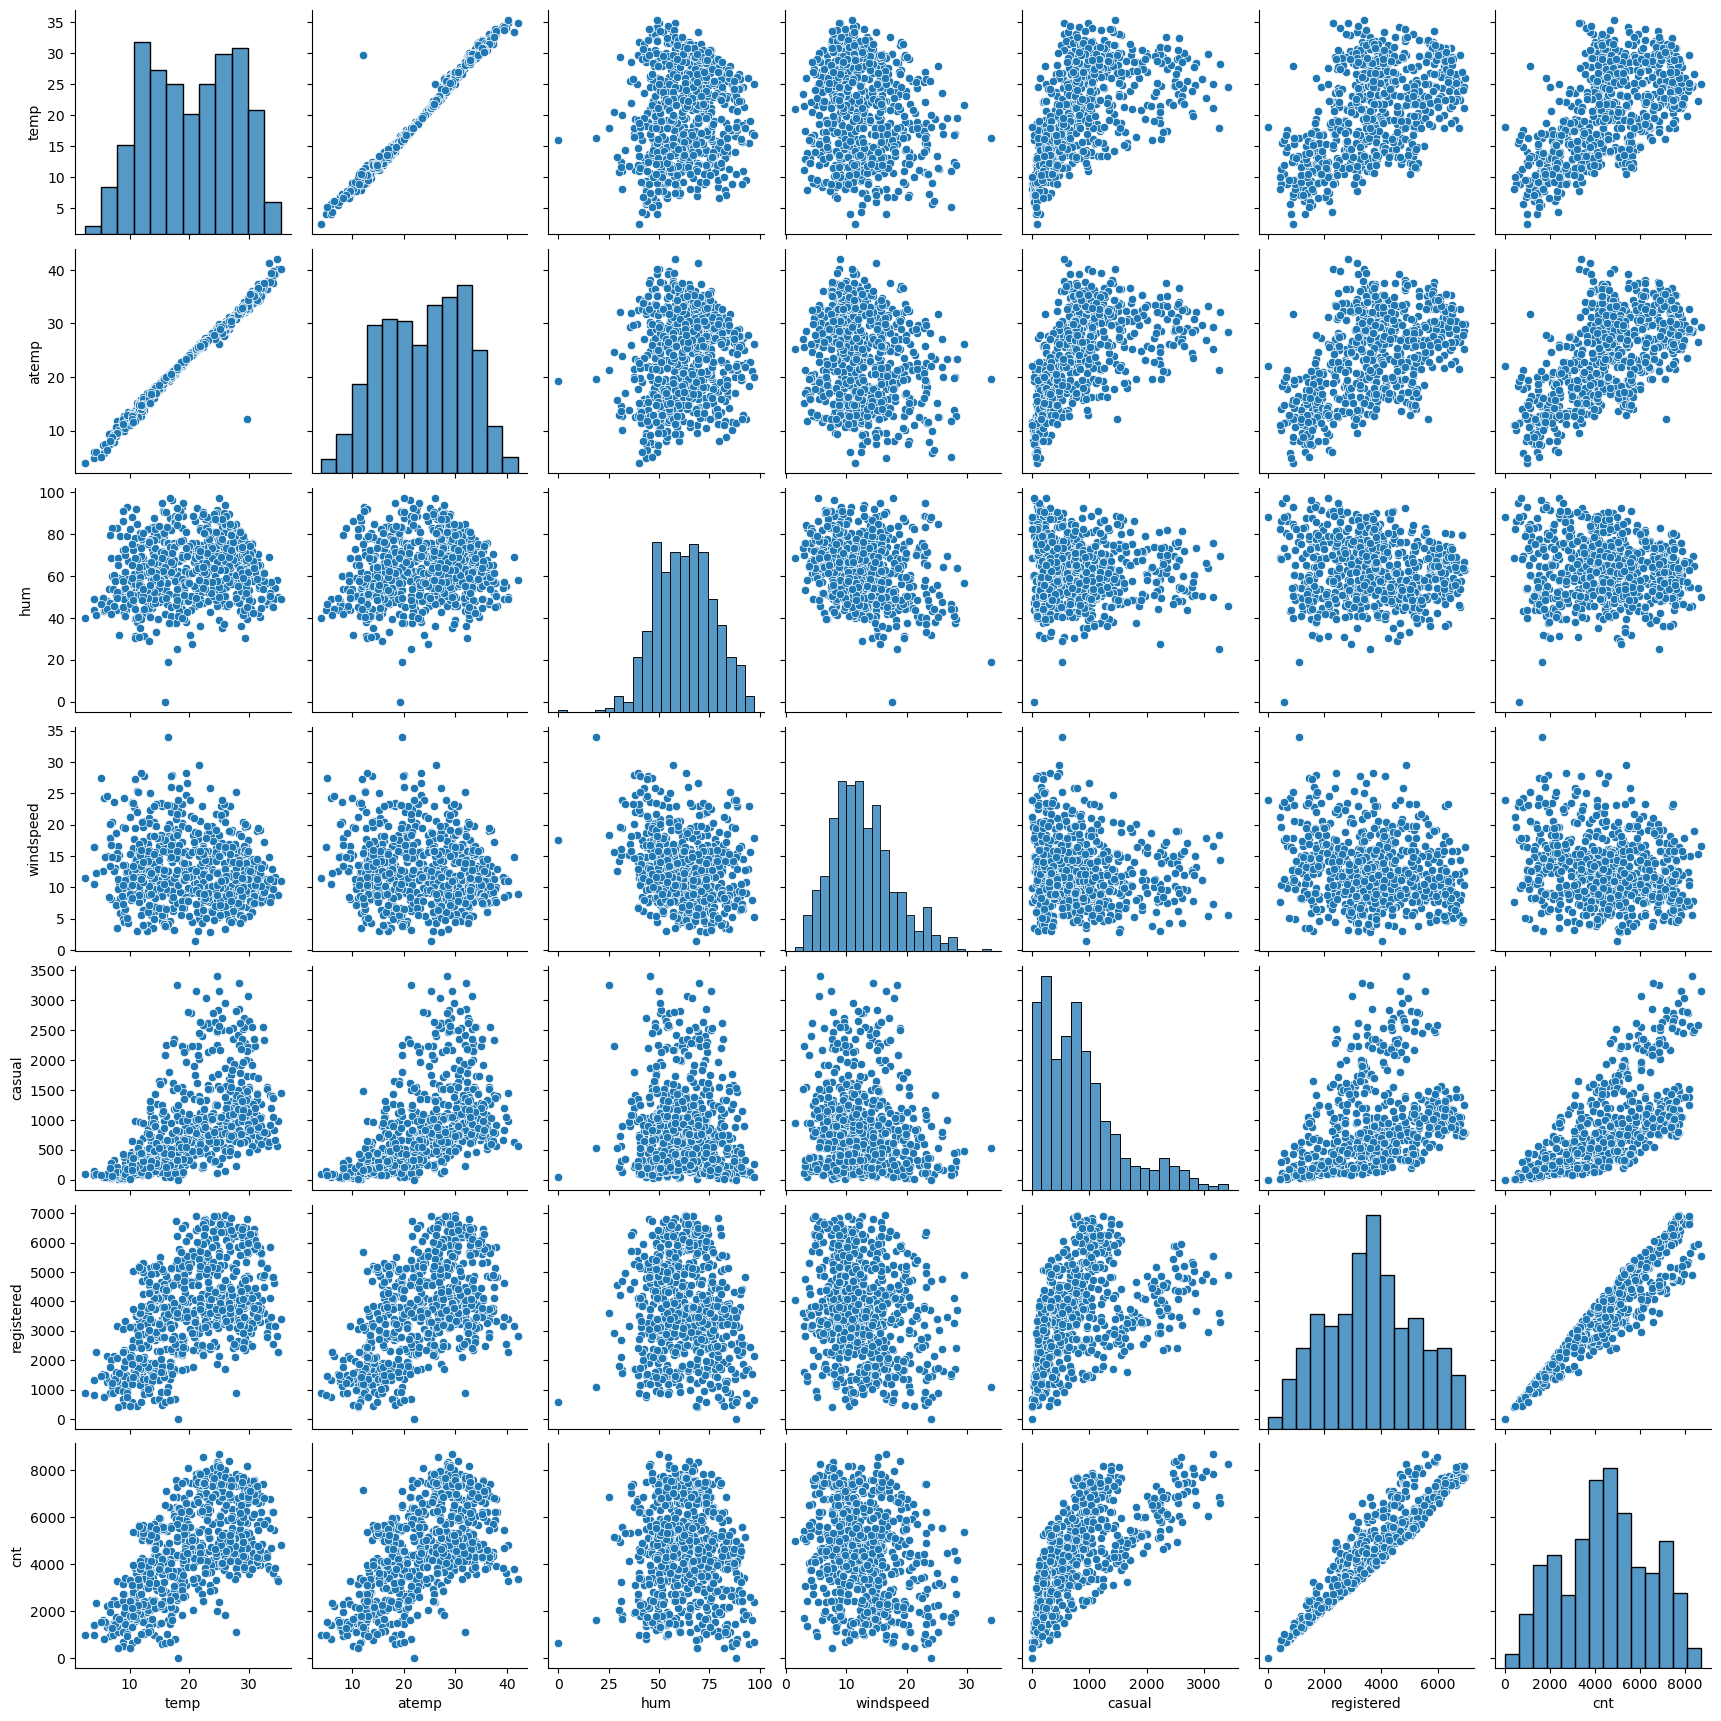

In [10]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(day, vars=["temp", "atemp", "hum", "windspeed", "casual", "registered","cnt"])
plt.show()

As we can see from the graph above, there is strong correlation between the count variable and temperature, humidity and windspeed. We shall explore these correlation with different variables further. 

## Step2: Preparing the Data for ML Model
- Encoding:
    - Converting binary Categorical vars to 1/0
    - Other Categorical variables to dummy vars
- Splitting into train & set
- Rescaling of variables

In [11]:
# season has four levels (1:spring, 2:summer, 3:fall, 4:winter)
season = pd.get_dummies(day['season'])
season.head()

1      2      3      4
0  True  False  False  False
1  True  False  False  False
2  True  False  False  False
3  True  False  False  False
4  True  False  False  False

In [12]:
int_season = season.astype(int)
int_season.head()

1  2  3  4
0  1  0  0  0
1  1  0  0  0
2  1  0  0  0
3  1  0  0  0
4  1  0  0  0

In [13]:
int_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    int64
 1   2       730 non-null    int64
 2   3       730 non-null    int64
 3   4       730 non-null    int64
dtypes: int64(4)
memory usage: 22.9 KB


In [14]:
season_desc = int_season.rename(columns={1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace = False)
season_desc.sample(5)

spring  summer  fall  winter
655       0       0     0       1
365       1       0     0       0
543       0       0     1       0
709       0       0     0       1
79        0       1     0       0

In [15]:
day = pd.concat((day, season_desc), axis=1)
day.sample(5)

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
301       4   0    10        0        6           0           3  10.420847   
22        1   0     1        0        0           0           1   3.957390   
649       4   1    10        0        5           1           1  17.937500   
402       1   1     2        0        2           1           1  14.520847   
355       1   0    12        0        4           1           2  17.356653   

         atemp      hum  windspeed  casual  registered   cnt  spring  summer  \
301  11.395650  88.2500  23.541857      57         570   627       0       0   
22    4.941955  43.6522  16.522200     150         836   986       1       0   
649  21.653550  53.9167  15.751164    1060        6222  7282       0       0   
402  18.055200  49.6250   9.874393     199        4176  4375       1       0   
355  21.306050  75.7500   3.167425     227        2841  3068       1       0   

     fall  winter  
301     0       1  
22      0       0  
649     0       1  
402     0       0  
355     0       0

In [16]:
# As part of Dummy variables concepts, the number of columns has to be (k-1). Hence removing 'spring' and 
# the actual numeric variable 'season'
day = day.drop(['season', 'spring'], axis=1)
day.sample(5)

yr  mnth  holiday  weekday  workingday  weathersit       temp     atemp  \
393   1     1        0        0           0           1  11.582500  13.63605   
219   0     8        0        1           1           1  31.365000  35.16415   
122   0     5        0        2           1           2  25.283347  29.10395   
302   0    10        0        0           0           1  13.085847  16.06645   
218   0     8        0        0           0           1  30.442500  35.76460   

         hum  windspeed  casual  registered   cnt  summer  fall  winter  
393  31.1250  16.083350     558        2685  3243       0     0       0  
219  59.2083  12.875725     846        3480  4326       0     1       0  
122  69.7083  22.958689     603        3848  4451       1     0       0  
302  62.3750  11.833339     885        2446  3331       0     0       1  
218  75.2917  13.499629    1298        2487  3785       0     1       0

In [17]:
# Month has 12 levels (1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec')
month = pd.get_dummies(day['mnth'])
month.head()

1      2      3      4      5      6      7      8      9      10     11  \
0  True  False  False  False  False  False  False  False  False  False  False   
1  True  False  False  False  False  False  False  False  False  False  False   
2  True  False  False  False  False  False  False  False  False  False  False   
3  True  False  False  False  False  False  False  False  False  False  False   
4  True  False  False  False  False  False  False  False  False  False  False   

      12  
0  False  
1  False  
2  False  
3  False  
4  False

In [18]:
int_month = month.astype(int)
int_month.head()

1   2   3   4   5   6   7   8   9   10  11  12
0   1   0   0   0   0   0   0   0   0   0   0   0
1   1   0   0   0   0   0   0   0   0   0   0   0
2   1   0   0   0   0   0   0   0   0   0   0   0
3   1   0   0   0   0   0   0   0   0   0   0   0
4   1   0   0   0   0   0   0   0   0   0   0   0

In [19]:
int_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    int64
 1   2       730 non-null    int64
 2   3       730 non-null    int64
 3   4       730 non-null    int64
 4   5       730 non-null    int64
 5   6       730 non-null    int64
 6   7       730 non-null    int64
 7   8       730 non-null    int64
 8   9       730 non-null    int64
 9   10      730 non-null    int64
 10  11      730 non-null    int64
 11  12      730 non-null    int64
dtypes: int64(12)
memory usage: 68.6 KB


In [20]:
month_desc = int_month.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May', \
                               6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
month_desc.sample(5)

Jan  Feb  March  April  May  June  July  Aug  Sep  Oct  Nov  Dec
117    0    0      0      1    0     0     0    0    0    0    0    0
272    0    0      0      0    0     0     0    0    1    0    0    0
639    0    0      0      0    0     0     0    0    0    1    0    0
141    0    0      0      0    1     0     0    0    0    0    0    0
132    0    0      0      0    1     0     0    0    0    0    0    0

In [21]:
day = pd.concat((day,month_desc),axis=1)
day.sample(5)

yr  mnth  holiday  weekday  workingday  weathersit       temp     atemp  \
527   1     6        0        2           1           2  26.786653  29.89375   
226   0     8        0        1           1           1  27.299153  30.80835   
348   0    12        0        4           1           2  17.322500  20.61185   
138   0     5        0        4           1           2  21.764153  25.53710   
96    0     4        0        4           1           1  17.937500  21.68480   

         hum  windspeed  ...  March  April  May  June  July  Aug  Sep  Oct  \
527  83.3333  14.374582  ...      0      0    0     1     0    0    0    0   
226  71.2083  13.999918  ...      0      0    0     0     0    1    0    0   
348  63.4167  17.958814  ...      0      0    0     0     0    0    0    0   
138  82.9583   7.250271  ...      0      0    1     0     0    0    0    0   
96   60.2917  10.874904  ...      0      1    0     0     0    0    0    0   

     Nov  Dec  
527    0    0  
226    0    0  
348    0    1  
138    0    0  
96     0    0  

[5 rows x 28 columns]

In [22]:
# As part of Dummy variables concepts, the number of columns has to be (k-1). Hence removing 'Jan' and 
# the actual numeric variable 'mnth'
day = day.drop(['mnth', 'Jan'], axis=1)
day.sample(5)

yr  holiday  weekday  workingday  weathersit       temp     atemp  \
431   1        0        4           1           1  21.627500  26.23020   
424   1        0        4           1           1  19.919153  23.76855   
319   0        0        3           1           3  18.723347  22.59940   
413   1        0        6           0           1  14.213347  17.77125   
712   1        0        5           1           1  11.548347  14.70960   

         hum  windspeed  casual  ...  March  April  May  June  July  Aug  Sep  \
431  56.7500  29.584721     486  ...      1      0    0     0     0    0    0   
424  61.5417  15.208129     325  ...      1      0    0     0     0    0    0   
319  93.0000   9.167543     145  ...      0      0    0     0     0    0    0   
413  53.4583  12.792243    1435  ...      0      0    0     0     0    0    0   
712  64.2917   8.792343     429  ...      0      0    0     0     0    0    0   

     Oct  Nov  Dec  
431    0    0    0  
424    0    0    0  
319    0    1    0  
413    0    0    0  
712    0    0    1  

[5 rows x 26 columns]

In [23]:
day.shape

(730, 26)

In [24]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   weekday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   casual      730 non-null    int64  
 10  registered  730 non-null    int64  
 11  cnt         730 non-null    int64  
 12  summer      730 non-null    int64  
 13  fall        730 non-null    int64  
 14  winter      730 non-null    int64  
 15  Feb         730 non-null    int64  
 16  March       730 non-null    int64  
 17  April       730 non-null    int64  
 18  May         730 non-null    int64  
 19  June        730 non-null    i

### Variable holiday is already encode to binary form where 

. 1 represents holiday

. 0 represents not a holiday

In [25]:
# weekday has seven levels (1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',5:'Friday',6:'Saturday',0:'Sunday')
weekday = pd.get_dummies(day['weekday'])
weekday.head()

0      1      2      3      4      5      6
0  False  False  False  False  False  False   True
1   True  False  False  False  False  False  False
2  False   True  False  False  False  False  False
3  False  False   True  False  False  False  False
4  False  False  False   True  False  False  False

In [26]:
int_weekday = weekday.astype(int)
int_weekday.head()

0  1  2  3  4  5  6
0  0  0  0  0  0  0  1
1  1  0  0  0  0  0  0
2  0  1  0  0  0  0  0
3  0  0  1  0  0  0  0
4  0  0  0  1  0  0  0

In [27]:
int_weekday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       730 non-null    int64
 1   1       730 non-null    int64
 2   2       730 non-null    int64
 3   3       730 non-null    int64
 4   4       730 non-null    int64
 5   5       730 non-null    int64
 6   6       730 non-null    int64
dtypes: int64(7)
memory usage: 40.1 KB


In [28]:
weekday_desc = int_weekday.rename(columns={1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday', \
                                           5:'Friday',6:'Saturday',0:'Sunday'},inplace = False)
weekday_desc.sample(5)

Sunday  Monday  Tuesday  Wednesday  Thrusday  Friday  Saturday
351       1       0        0          0         0       0         0
97        0       0        0          0         0       1         0
429       0       0        1          0         0       0         0
373       0       1        0          0         0       0         0
651       1       0        0          0         0       0         0

In [29]:
day = pd.concat((day,weekday_desc),axis=1)
day.sample(5)

yr  holiday  weekday  workingday  weathersit       temp     atemp  \
716   1        0        2           1           1  16.844153  20.48540   
599   1        0        4           1           1  28.529153  31.85040   
617   1        0        1           1           1  23.916653  28.28270   
282   0        1        1           0           1  23.404153  27.14625   
204   0        0        0           0           1  34.030000  39.74145   

         hum  windspeed  casual  ...  Oct  Nov  Dec  Sunday  Monday  Tuesday  \
716  66.6250  14.834068     433  ...    0    0    1       0       0        1   
599  63.5833   5.667919    1363  ...    0    0    0       0       0        0   
617  50.3750  17.333771    1118  ...    0    0    0       0       1        0   
282  73.3750   2.834381    1514  ...    1    0    0       0       1        0   
204  55.0833  11.334457    1050  ...    0    0    0       1       0        0   

     Wednesday  Thrusday  Friday  Saturday  
716          0         0       0         0  
599          0         1       0         0  
617          0         0       0         0  
282          0         0       0         0  
204          0         0       0         0  

[5 rows x 33 columns]

In [30]:
# As part of Dummy variables concepts, the number of columns has to be (k-1). Hence removing 'Sunday' and 
# the actual numeric variable 'weekday'
day = day.drop(['weekday','Sunday'],axis=1)
day.sample(5)

yr  holiday  workingday  weathersit       temp     atemp      hum  \
432   1        0           1           2  16.844153  19.85415  40.7083   
491   1        0           1           2  22.037500  26.35710  66.4167   
454   1        0           0           2  17.390847  21.08540  73.8333   
446   1        0           1           2  24.668347  28.50335  69.4167   
124   0        0           1           1  18.825847  22.09585  44.4167   

     windspeed  casual  registered  ...  Sep  Oct  Nov  Dec  Monday  Tuesday  \
432  27.791600     447        4122  ...    0    0    0    0       0        0   
491  15.458307    1008        5265  ...    0    0    0    0       1        0   
454  16.791339    2301        3934  ...    0    0    0    0       0        0   
446   7.792100    2469        5893  ...    0    0    0    0       0        0   
124  19.791264     614        3819  ...    0    0    0    0       0        0   

     Wednesday  Thrusday  Friday  Saturday  
432          0         0       1         0  
491          0         0       0         0  
454          0         0       0         1  
446          0         0       1         0  
124          0         1       0         0  

[5 rows x 31 columns]

### Variable workingday is already encode to binary form where
. 1 represents neither weekend or holiday

. 0 otherwise

In [31]:
weathersit = pd.get_dummies(day['weathersit'])
weathersit.sample(5)

1      2      3
299  False   True  False
113  False   True  False
653   True  False  False
42    True  False  False
98   False   True  False

In [32]:
int_weathersit = weathersit.astype(int)
int_weathersit.head()

1  2  3
0  0  1  0
1  0  1  0
2  1  0  0
3  1  0  0
4  1  0  0

In [33]:
int_weathersit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       730 non-null    int64
 1   2       730 non-null    int64
 2   3       730 non-null    int64
dtypes: int64(3)
memory usage: 17.2 KB


In [34]:
weathersit_desc = int_weathersit.rename(columns={1:'Clear' ,2: 'Mist' , 3: 'Light'},inplace = False)
weathersit_desc.sample(5)

Clear  Mist  Light
115      1     0      0
611      1     0      0
6        0     1      0
506      0     1      0
23       1     0      0

In [35]:
day = pd.concat((day,weathersit_desc), axis =1)
day.sample(5)

yr  holiday  workingday  weathersit       temp     atemp      hum  \
71    0        0           0           1  15.758268  19.00455  52.7391   
539   1        0           0           1  30.476653  33.71270  47.9167   
411   1        0           1           2  12.983347  16.50810  75.2917   
582   1        0           1           2  30.852500  35.51230  65.4167   
210   0        0           0           1  32.970847  36.42685  46.5833   

     windspeed  casual  registered  ...  Dec  Monday  Tuesday  Wednesday  \
71   18.130468     982        1435  ...    0       0        0          0   
539   9.750175    2551        4340  ...    0       0        0          0   
411   6.125475      74        2931  ...    0       0        0          0   
582   8.666718    1233        5780  ...    0       1        0          0   
210  11.291979    1559        2916  ...    0       0        0          0   

     Thrusday  Friday  Saturday  Clear  Mist  Light  
71          0       0         0      1     0      0  
539         0       0         0      1     0      0  
411         1       0         0      0     1      0  
582         0       0         0      0     1      0  
210         0       0         1      1     0      0  

[5 rows x 34 columns]

In [36]:
# As we don't need the Feature 'weathersit' now as we have already expanded so we can drop it
day = day.drop('weathersit',axis=1)

In [37]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   casual      730 non-null    int64  
 8   registered  730 non-null    int64  
 9   cnt         730 non-null    int64  
 10  summer      730 non-null    int64  
 11  fall        730 non-null    int64  
 12  winter      730 non-null    int64  
 13  Feb         730 non-null    int64  
 14  March       730 non-null    int64  
 15  April       730 non-null    int64  
 16  May         730 non-null    int64  
 17  June        730 non-null    int64  
 18  July        730 non-null    int64  
 19  Aug         730 non-null    i

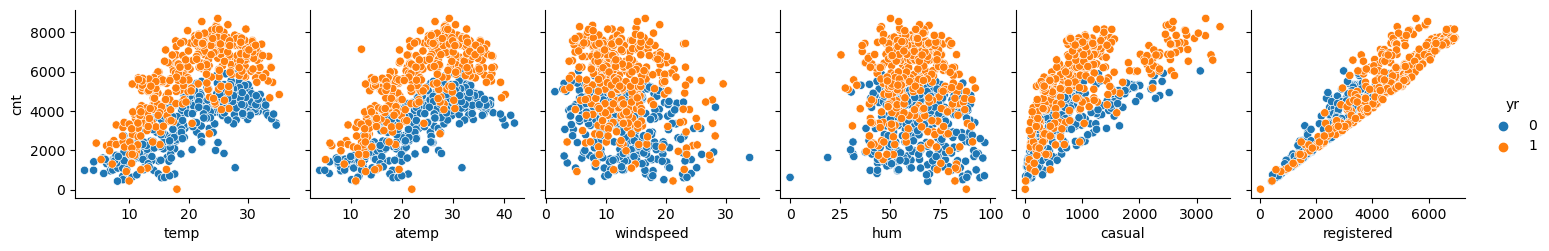

In [38]:
# Visualization of Relationship of Numerical Features against Target Variable
sns.pairplot(day, x_vars=["temp",'atemp', 'windspeed',"hum",'casual','registered'],y_vars=['cnt'],hue ='yr')
plt.show()

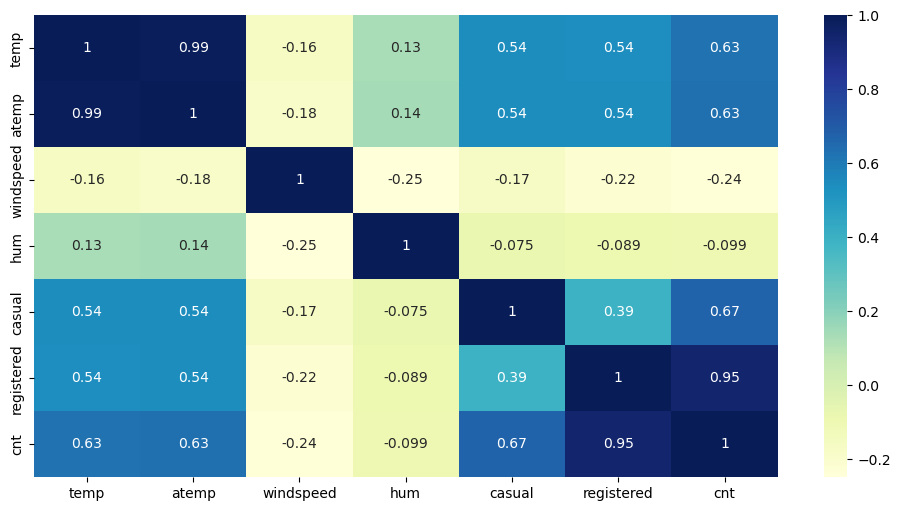

In [39]:
plt.figure(figsize = (12,6))
sns.heatmap(day[["temp",'atemp', 'windspeed',"hum",'casual','registered','cnt']].corr(),annot =True, cmap="YlGnBu")
plt.show()

From Above two plot below are the observations:
* > Registered Bike users are more than Casual and is strongly correlated with Target Variable
* > Temp and atemp are very strongly correlated and one can be dropped
* > Humidity has not much Negative effect on the Target Variable.
* > Since after a user rented a Bike only we can determine He or She has registered or Casually done so both the Features are actually Target Feature
    Since we have already a Target Feature we can drop these two.

In [40]:
day = day.drop(['atemp','casual','registered'],axis =1)

In [41]:
day.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  summer  fall  \
0   0        0           0  14.110847  80.5833  10.749882   985       0     0   
1   0        0           0  14.902598  69.6087  16.652113   801       0     0   
2   0        0           1   8.050924  43.7273  16.636703  1349       0     0   
3   0        0           1   8.200000  59.0435  10.739832  1562       0     0   
4   0        0           1   9.305237  43.6957  12.522300  1600       0     0   

   winter  ...  Dec  Monday  Tuesday  Wednesday  Thrusday  Friday  Saturday  \
0       0  ...    0       0        0          0         0       0         1   
1       0  ...    0       0        0          0         0       0         0   
2       0  ...    0       1        0          0         0       0         0   
3       0  ...    0       0        1          0         0       0         0   
4       0  ...    0       0        0          1         0       0         0   

   Clear  Mist  Light  
0      0     1      0  
1      0     1      0  
2      1     0      0  
3      1     0      0  
4      1     0      0  

[5 rows x 30 columns]

In [42]:
day.groupby(['Clear', 'Mist','Light','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

Clear  Mist  Light  summer  fall  winter
1      0     0      0       1     0         5878.257353
                    1       0     0         5548.548673
0      1     0      0       1     0         5222.479167
1      0     0      0       0     1         5043.563107
0      1     0      0       0     1         4654.000000
                    1       0     0         4236.705882
1      0     0      0       0     0         2811.135135
0      0     1      0       1     0         2751.750000
       1     0      0       0     0         2365.215385
       0     1      0       0     1         1961.600000
                    1       0     0         1169.000000
                    0       0     0          934.750000
Name: cnt, dtype: float64

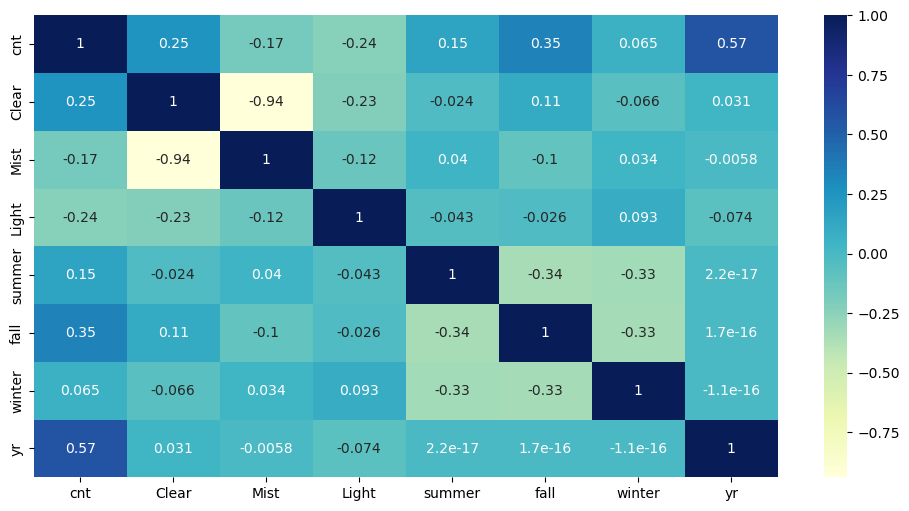

In [43]:
plt.figure(figsize = (12,6))
sns.heatmap(day[['cnt','Clear', 'Mist','Light','summer','fall','winter','yr']].corr(),annot =True, cmap="YlGnBu")
plt.show()

In [44]:
day.groupby(['summer','fall','winter','Feb','March','April','May','June', \
             'July' ,'Aug','Sep','Oct','Nov','Dec'])['cnt'].mean().sort_values(ascending = False)

summer  fall  winter  Feb  March  April  May  June  July  Aug  Sep  Oct  Nov  Dec
0       0     1       0    0      0      0    0     0     0    1    0    0    0      6024.500000
1       0     0       0    0      0      0    1     0     0    0    0    0    0      5773.850000
0       1     0       0    0      0      0    1     0     0    0    0    0    0      5769.400000
                                              0     0     0    1    0    0    0      5672.704545
                                                          1    0    0    0    0      5664.419355
                                                    1     0    0    0    0    0      5563.677419
1       0     0       0    0      0      1    0     0     0    0    0    0    0      5349.774194
0       0     1       0    0      0      0    0     0     0    0    1    0    0      5199.225806
1       0     0       0    0      1      0    0     0     0    0    0    0    0      4484.900000
0       0     1       0    0      0      0   

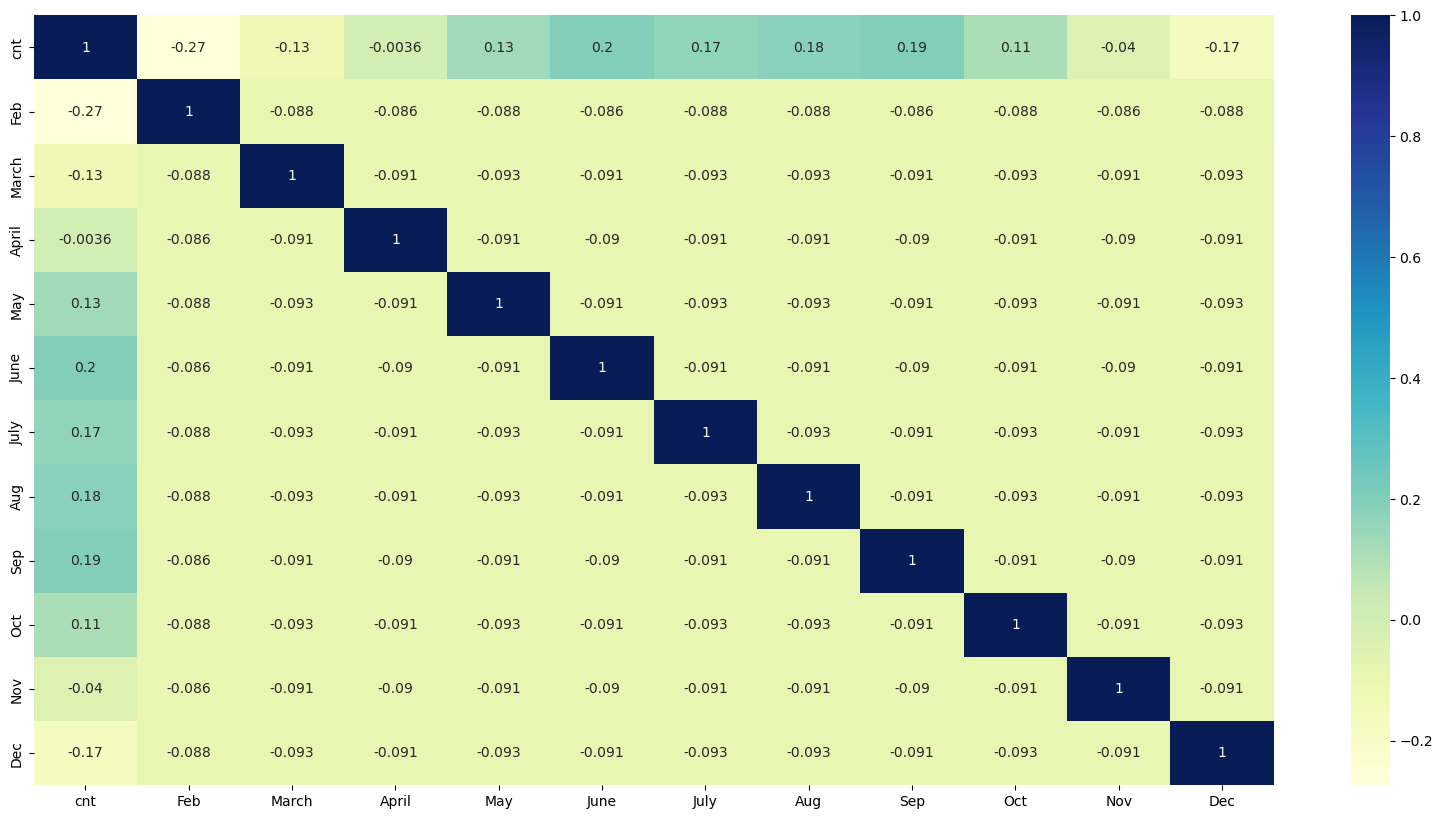

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(day[['cnt','Feb','March','April','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),
            annot = True, cmap="YlGnBu")
plt.show()

* > Most number of the Bike has been rented in the Year 2019 in the month of September. 
However in the Year 2018 it was in the June Month.

* > Basically in the Winter Season BOOM Bikes can expect more demand for Rent of Bikes.

In [46]:
day.groupby(['holiday', 'workingday','summer','fall','winter'])['cnt'].mean().sort_values(ascending = False)

holiday  workingday  summer  fall  winter
0        1           0       1     0         5718.114504
1        0           0       1     0         5707.750000
0        0           0       1     0         5457.075472
                     1       0     0         5160.365385
         1           1       0     0         4926.664062
1        0           1       0     0         4909.250000
0        1           0       0     1         4785.611570
         0           0       0     1         4674.549020
1        0           0       0     1         4025.333333
0        1           0       0     0         2788.495798
         0           0       0     0         2330.888889
1        0           0       0     0         1687.857143
Name: cnt, dtype: float64

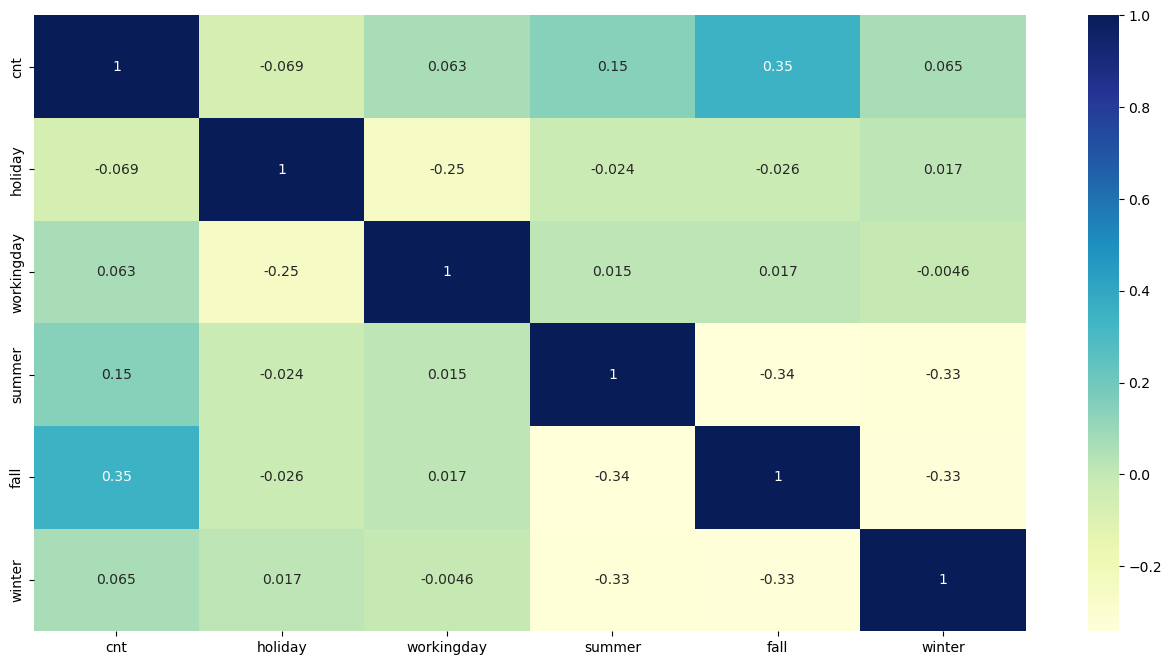

In [47]:
plt.figure(figsize = (16,8))
sns.heatmap(day[['cnt','holiday', 'workingday','summer','fall','winter']].corr(),annot = True, cmap="YlGnBu")
plt.show()

> **Most of the Bike has been rented during the weekdays**

> **Rent of bike is least on the Holiday**

## Splitting into train and test with train = 0.7 & test = 0.3

In [48]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(day,train_size=0.7, test_size=0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. All the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation): Between 0 & 1
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [49]:
# 1. Instantiate the object
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

count      mean       std  min       25%       50%       75%  max
yr          510.0  0.507843  0.500429  0.0  0.000000  1.000000  1.000000  1.0
holiday     510.0  0.025490  0.157763  0.0  0.000000  0.000000  0.000000  1.0
workingday  510.0  0.676471  0.468282  0.0  0.000000  1.000000  1.000000  1.0
temp        510.0  0.537262  0.225844  0.0  0.339853  0.540519  0.735215  1.0
hum         510.0  0.650369  0.145882  0.0  0.538643  0.653714  0.754830  1.0
windspeed   510.0  0.320768  0.169797  0.0  0.199179  0.296763  0.414447  1.0
cnt         510.0  0.513620  0.224593  0.0  0.356420  0.518638  0.684710  1.0
summer      510.0  0.245098  0.430568  0.0  0.000000  0.000000  0.000000  1.0
fall        510.0  0.262745  0.440557  0.0  0.000000  0.000000  1.000000  1.0
winter      510.0  0.249020  0.432870  0.0  0.000000  0.000000  0.000000  1.0
Feb         510.0  0.066667  0.249689  0.0  0.000000  0.000000  0.000000  1.0
March       510.0  0.098039  0.297660  0.0  0.000000  0.000000  0.000000  1.0
April       510.0  0.078431  0.269113  0.0  0.000000  0.000000  0.000000  1.0
May         510.0  0.084314  0.278131  0.0  0.000000  0.000000  0.000000  1.0
June        510.0  0.074510  0.262857  0.0  0.000000  0.000000  0.000000  1.0
July        510.0  0.076471  0.266010  0.0  0.000000  0.000000  0.000000  1.0
Aug         510.0  0.096078  0.294988  0.0  0.000000  0.000000  0.000000  1.0
Sep         510.0  0.080392  0.272166  0.0  0.000000  0.000000  0.000000  1.0
Oct         510.0  0.086275  0.281045  0.0  0.000000  0.000000  0.000000  1.0
Nov         510.0  0.086275  0.281045  0.0  0.000000  0.000000  0.000000  1.0
Dec         510.0  0.084314  0.278131  0.0  0.000000  0.000000  0.000000  1.0
Monday      510.0  0.150980  0.358381  0.0  0.000000  0.000000  0.000000  1.0
Tuesday     510.0  0.131373  0.338139  0.0  0.000000  0.000000  0.000000  1.0
Wednesday   510.0  0.158824  0.365870  0.0  0.000000  0.000000  0.000000  1.0
Thrusday    510.0  0.133333  0.340268  0.0  0.000000  0.000000  0.000000  1.0
Friday      510.0  0.127451  0.333805  0.0  0.000000  0.000000  0.000000  1.0
Saturday    510.0  0.154902  0.362166  0.0  0.000000  0.000000  0.000000  1.0
Clear       510.0  0.627451  0.483958  0.0  0.000000  1.000000  1.000000  1.0
Mist        510.0  0.343137  0.475223  0.0  0.000000  0.000000  1.000000  1.0
Light       510.0  0.029412  0.169124  0.0  0.000000  0.000000  0.000000  1.0

> **We can see MinMax Scaling has been done properly for the Training Data as the Minimum
value is 0 for each of the Feature and Maximum value is 1 for each of the Feature**

## Step-3: Training the Model

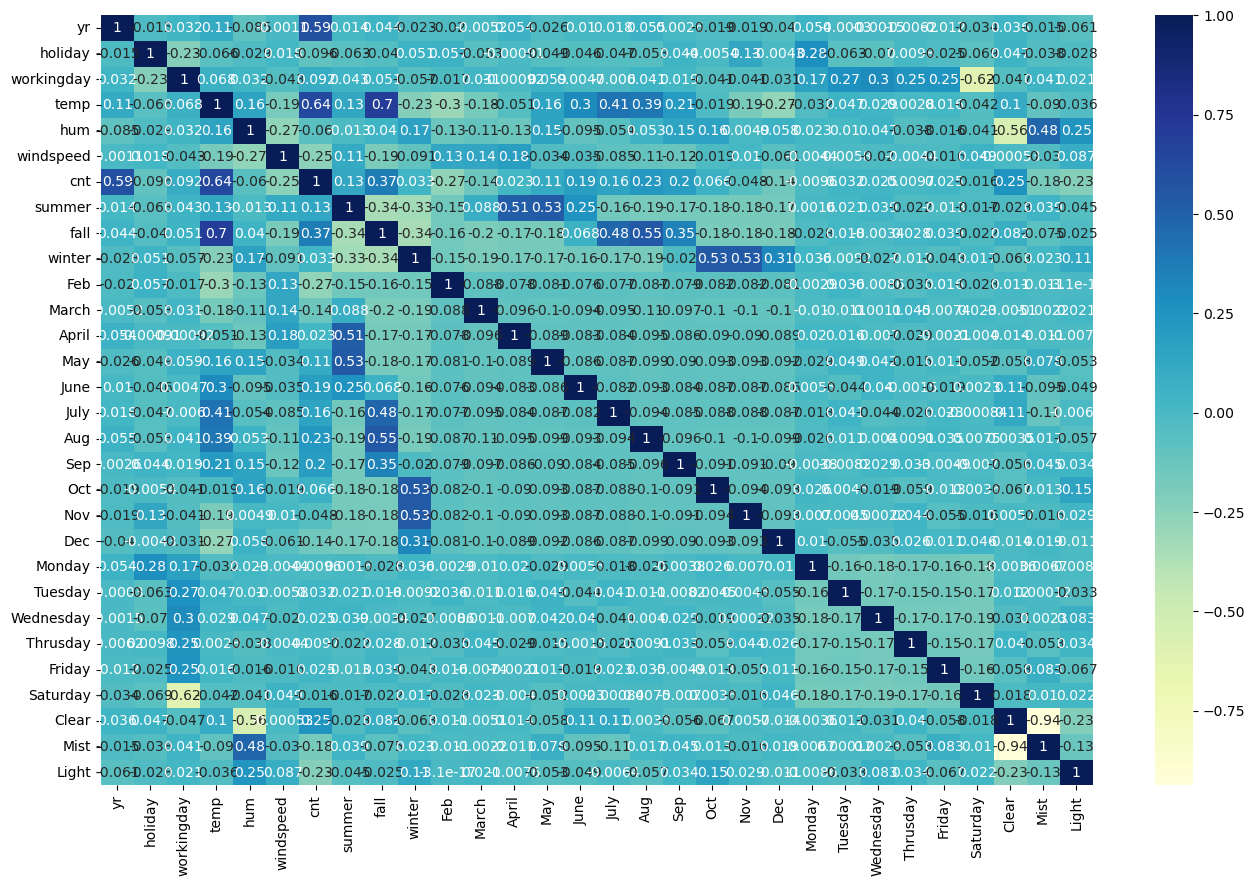

In [50]:
# heatmap
plt.figure(figsize= (16, 10))
sns.heatmap(df_train.corr(), annot= True, cmap="YlGnBu")
plt.show()

> **As we can see from the heatmap, the count seems to be heavily correlated with the temp variable. We will now observe the variance using pairplots**

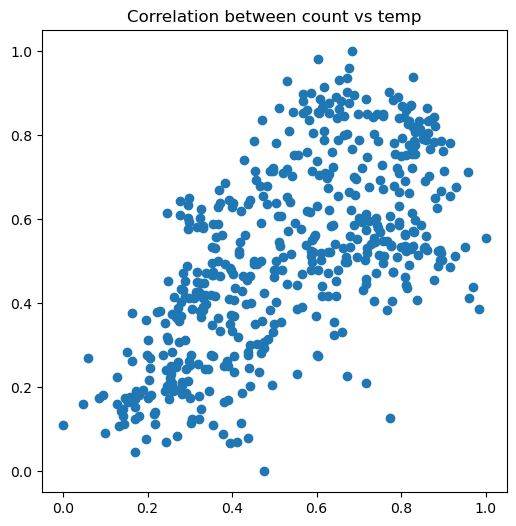

In [51]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

In [52]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


539    0.790267
594    0.902324
483    0.722734
302    0.380695
324    0.315578
Name: cnt, dtype: float64

### Performing by using stats model

In [53]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.169798
temp     0.639952
dtype: float64

In [54]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           5.80e-61
Time:                        11:36:42   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* > From the above output, the coefficient is significant based on P value which is zero.

* > That means there is a strong relationship between coeffocient and temp parameter. 

* > R-squared is .414 which means 41% of the variance in the count quantity is explained by temp

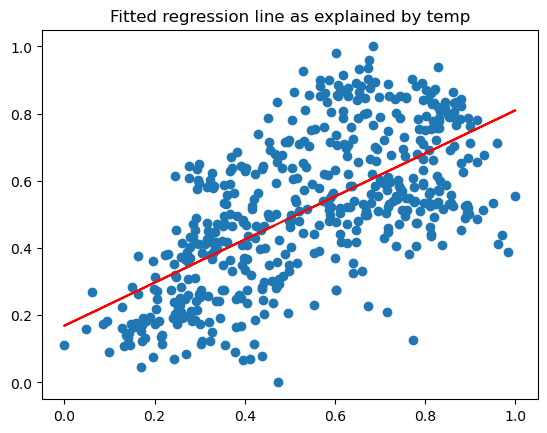

In [55]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [56]:
#adding another variable thus performing multiple regression 
#adding variable yr and checking to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [57]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          9.25e-130
Time:                        11:36:42   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
temp           0.5836      0.025     23.604      0.000       0.535       0.632
yr             0.2372      0.011     21.261      0.000       0.215       0.259
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* > From the above output, the coefficient is still significant based on P value which is zero.

* > That means there is a strong relationship between coeffocient and temp, yr parameter. 

* > R-squared is .690 which means 69% of the variance in the count quantity is explained by temperature and year data

In [58]:
#adding all variables and finding out the R-squared values
#checking all the variables in our dataset
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'Feb', 'March', 'April', 'May', 'June',
       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Monday', 'Tuesday',
       'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Clear', 'Mist',
       'Light'],
      dtype='object')

In [59]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)

#create third model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.052374
yr            0.232116
holiday      -0.042974
workingday    0.043951
temp          0.450562
hum          -0.151340
windspeed    -0.186453
summer        0.086884
fall          0.048159
winter        0.154006
Feb           0.030495
March         0.063822
April         0.062777
May           0.086717
June          0.059804
July          0.022427
Aug           0.077181
Sep           0.143836
Oct           0.070310
Nov           0.020925
Dec           0.017191
Monday       -0.009827
Tuesday      -0.007810
Wednesday     0.005692
Thrusday      0.001843
Friday        0.011080
Saturday      0.054536
Clear         0.123628
Mist          0.062561
Light        -0.133815
dtype: float64

In [60]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.74e-182
Time:                        11:36:42   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0524      0.027      1.974      0.049       0.000       0.105
yr             0.2321      0.008     28.820      0.000       0.216       0.248
holiday       -0.0430      0.024     -1.823      0.069      -0.089       0.003
workingday     0.0440      0.009      4.702      0.000       0.026       0.062
temp           0.4506      0.046      9.734      0.000       0.360       0.542
hum           -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed     -0.1865      0.026     -7.257      0.000      -0.237      -0.136
summer         0.0869      0.024      3.686      0.000       0.041       0.133
fall           0.0482      0.030      1.607      0.109      -0.011       0.107
winter         0.1540      0.026      5.939      0.000       0.103       0.205
Feb            0.0305      0.021      1.481      0.139      -0.010       0.071
March          0.0638      0.022      2.858      0.004       0.020       0.108
April          0.0628      0.034      1.873      0.062      -0.003       0.129
May            0.0867      0.036      2.401      0.017       0.016       0.158
June           0.0598      0.039      1.535      0.125      -0.017       0.136
July           0.0224      0.044      0.510      0.610      -0.064       0.109
Aug            0.0772      0.042      1.848      0.065      -0.005       0.159
Sep            0.1438      0.037      3.845      0.000       0.070       0.217
Oct            0.0703      0.034      2.044      0.041       0.003       0.138
Nov            0.0209      0.033      0.638      0.524      -0.044       0.085
Dec            0.0172      0.026      0.649      0.516      -0.035       0.069
Monday        -0.0098      0.010     -1.012      0.312      -0.029       0.009
Tuesday       -0.0078      0.011     -0.700      0.484      -0.030       0.014
Wednesday      0.0057      0.010      0.542      0.588      -0.015       0.026
Thrusday       0.0018      0.011      0.169      0.866      -0.020       0.023
Friday         0.0111      0.011      0.996      0.320      -0.011       0.033
Saturday       0.0545      0.015      3.760      0.000       0.026       0.083
Clear          0.1236      0.009     14.040      0.000       0.106       0.141
Mist           0.0626      0.012      5.372      0.000       0.040       0.085
Light         -0.1338      0.022     -6.006      0.000      -0.178      -0.090
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.22e+16
==============================================================================

N

* > R-squared is 0.853 which means 85% of the variance in the count quantity is explained with all the variables

## Splitting into train and test with train = 0.8 & test = 0.2

In [61]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(day,train_size=0.8, test_size=0.2, random_state=100)
print(df_train.shape)
print(df_test.shape)

(584, 30)
(146, 30)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. All the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation): Between 0 & 1
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [62]:
# 1. Instantiate the object
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

count      mean       std  min       25%       50%       75%  max
yr          584.0  0.513699  0.500241  0.0  0.000000  1.000000  1.000000  1.0
holiday     584.0  0.027397  0.163378  0.0  0.000000  0.000000  0.000000  1.0
workingday  584.0  0.667808  0.471403  0.0  0.000000  1.000000  1.000000  1.0
temp        584.0  0.537414  0.225336  0.0  0.340113  0.545191  0.736512  1.0
hum         584.0  0.649499  0.144219  0.0  0.535852  0.653714  0.752361  1.0
windspeed   584.0  0.319463  0.168114  0.0  0.199177  0.294764  0.410413  1.0
cnt         584.0  0.515792  0.225336  0.0  0.350696  0.522837  0.691872  1.0
summer      584.0  0.246575  0.431387  0.0  0.000000  0.000000  0.000000  1.0
fall        584.0  0.251712  0.434369  0.0  0.000000  0.000000  1.000000  1.0
winter      584.0  0.250000  0.433384  0.0  0.000000  0.000000  0.250000  1.0
Feb         584.0  0.073630  0.261392  0.0  0.000000  0.000000  0.000000  1.0
March       584.0  0.090753  0.287504  0.0  0.000000  0.000000  0.000000  1.0
April       584.0  0.077055  0.266907  0.0  0.000000  0.000000  0.000000  1.0
May         584.0  0.087329  0.282558  0.0  0.000000  0.000000  0.000000  1.0
June        584.0  0.077055  0.266907  0.0  0.000000  0.000000  0.000000  1.0
July        584.0  0.075342  0.264169  0.0  0.000000  0.000000  0.000000  1.0
Aug         584.0  0.090753  0.287504  0.0  0.000000  0.000000  0.000000  1.0
Sep         584.0  0.080479  0.272267  0.0  0.000000  0.000000  0.000000  1.0
Oct         584.0  0.092466  0.289931  0.0  0.000000  0.000000  0.000000  1.0
Nov         584.0  0.080479  0.272267  0.0  0.000000  0.000000  0.000000  1.0
Dec         584.0  0.087329  0.282558  0.0  0.000000  0.000000  0.000000  1.0
Monday      584.0  0.148973  0.356367  0.0  0.000000  0.000000  0.000000  1.0
Tuesday     584.0  0.133562  0.340472  0.0  0.000000  0.000000  0.000000  1.0
Wednesday   584.0  0.154110  0.361363  0.0  0.000000  0.000000  0.000000  1.0
Thrusday    584.0  0.135274  0.342309  0.0  0.000000  0.000000  0.000000  1.0
Friday      584.0  0.123288  0.329049  0.0  0.000000  0.000000  0.000000  1.0
Saturday    584.0  0.150685  0.358048  0.0  0.000000  0.000000  0.000000  1.0
Clear       584.0  0.630137  0.483181  0.0  0.000000  1.000000  1.000000  1.0
Mist        584.0  0.342466  0.474941  0.0  0.000000  0.000000  1.000000  1.0
Light       584.0  0.027397  0.163378  0.0  0.000000  0.000000  0.000000  1.0

## Step-3: Training the Model

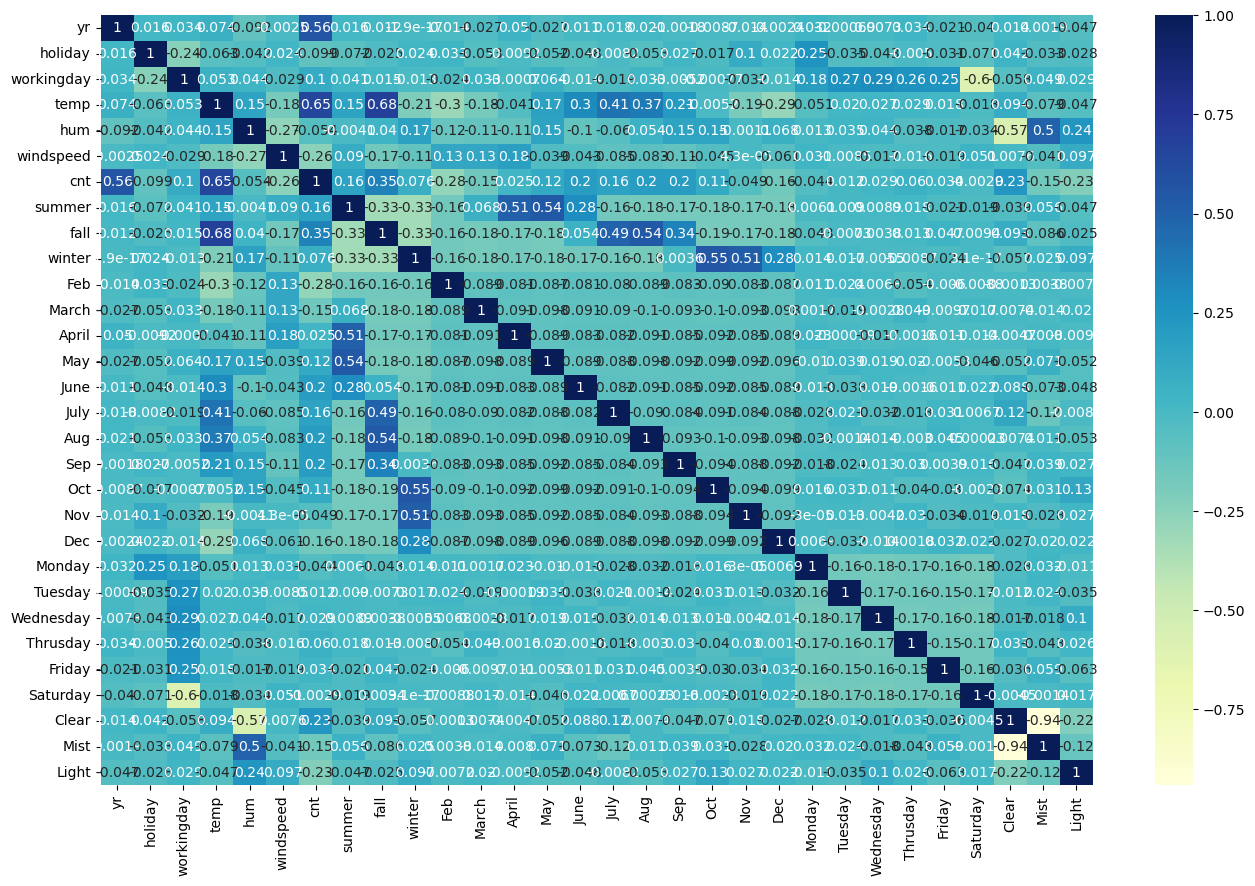

In [63]:
# heatmap
plt.figure(figsize= (16, 10))
sns.heatmap(df_train.corr(), annot= True, cmap="YlGnBu")
plt.show()

> **As we can see from the heatmap, the count seems to be heavily correlated with the temp variable. We will now observe the variance using pairplots**

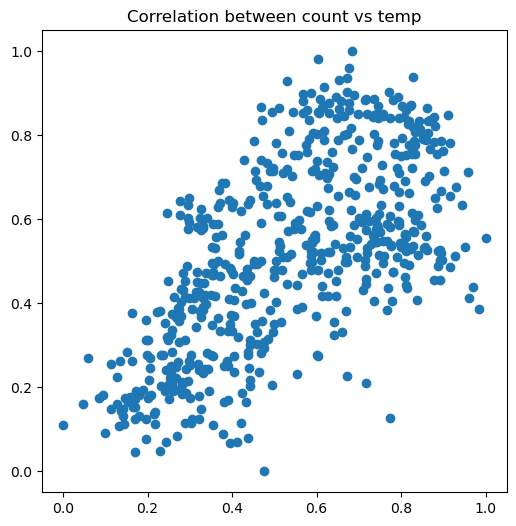

In [64]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

In [65]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(584, 29)


273    0.276921
9      0.149448
407    0.173378
94     0.203981
335    0.450759
Name: cnt, dtype: float64

### Performing by using stats model

In [66]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.167419
temp     0.648239
dtype: float64

In [67]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     421.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           6.57e-71
Time:                        11:36:44   Log-Likelihood:                 201.26
No. Observations:                 584   AIC:                            -398.5
Df Residuals:                     582   BIC:                            -389.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1674      0.018      9.104      0.000       0.131       0.204
temp           0.6482      0.032     20.538      0.000       0.586       0.710
==============================================================================
Omnibus:                        9.280   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.317
Skew:                           0.111   Prob(JB):                       0.0425
Kurtosis:                       2.542   Cond. No.                         5.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* > From the above output, the coefficient is significant based on P value which is zero.

* > That means there is a strong relationship between coeffocient and temp parameter. 

* > R-squared is .414 which means 41% of the variance in the count quantity is explained by temp

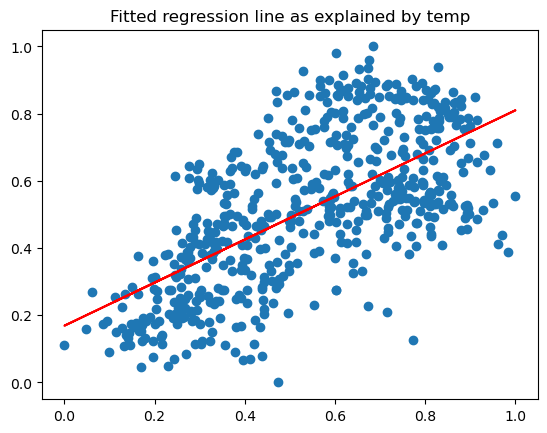

In [68]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [69]:
#adding another variable thus performing multiple regression 
#adding variable yr and checking to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.068300
temp     0.609811
yr       0.233154
dtype: float64

In [70]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     636.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.97e-147
Time:                        11:36:44   Log-Likelihood:                 380.94
No. Observations:                 584   AIC:                            -755.9
Df Residuals:                     581   BIC:                            -742.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0683      0.014      4.794      0.000       0.040       0.096
temp           0.6098      0.023     26.186      0.000       0.564       0.656
yr             0.2332      0.010     22.226      0.000       0.213       0.254
==============================================================================
Omnibus:                       34.672   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.996
Skew:                          -0.515   Prob(JB):                     1.70e-10
Kurtosis:                       3.888   Cond. No.                         6.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* > From the above output, the coefficient is still significant based on P value which is zero.

* > That means there is a strong relationship between coeffocient and temp, yr parameter. 

* > R-squared is .690 which means 69% of the variance in the count quantity is explained by temperature and year data

In [71]:
#adding all variables and finding out the R-squared values
#checking all the variables in our dataset
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'Feb', 'March', 'April', 'May', 'June',
       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Monday', 'Tuesday',
       'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Clear', 'Mist',
       'Light'],
      dtype='object')

In [72]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)

#create third model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.041407
yr            0.229189
holiday      -0.042350
workingday    0.049479
temp          0.448013
hum          -0.143536
windspeed    -0.181640
summer        0.097861
fall          0.055823
winter        0.164755
Feb           0.030332
March         0.061788
April         0.059194
May           0.077159
June          0.068225
July          0.024184
Aug           0.075794
Sep           0.136180
Oct           0.072039
Nov           0.008744
Dec           0.007104
Monday       -0.009935
Tuesday      -0.008584
Wednesday     0.006996
Thrusday      0.004566
Friday        0.014086
Saturday      0.060554
Clear         0.121429
Mist          0.062166
Light        -0.142188
dtype: float64

In [73]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.29e-216
Time:                        11:36:44   Log-Likelihood:                 613.13
No. Observations:                 584   AIC:                            -1170.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.025      1.679      0.094      -0.007       0.090
yr             0.2292      0.007     31.107      0.000       0.215       0.244
holiday       -0.0424      0.021     -2.051      0.041      -0.083      -0.002
workingday     0.0495      0.008      5.951      0.000       0.033       0.066
temp           0.4480      0.042     10.610      0.000       0.365       0.531
hum           -0.1435      0.036     -3.977      0.000      -0.214      -0.073
windspeed     -0.1816      0.024     -7.654      0.000      -0.228      -0.135
summer         0.0979      0.022      4.374      0.000       0.054       0.142
fall           0.0558      0.027      2.051      0.041       0.002       0.109
winter         0.1648      0.023      7.237      0.000       0.120       0.209
Feb            0.0303      0.018      1.646      0.100      -0.006       0.067
March          0.0618      0.021      2.996      0.003       0.021       0.102
April          0.0592      0.031      1.893      0.059      -0.002       0.121
May            0.0772      0.034      2.298      0.022       0.011       0.143
June           0.0682      0.035      1.923      0.055      -0.001       0.138
July           0.0242      0.040      0.609      0.543      -0.054       0.102
Aug            0.0758      0.038      2.004      0.046       0.002       0.150
Sep            0.1362      0.034      4.058      0.000       0.070       0.202
Oct            0.0720      0.030      2.364      0.018       0.012       0.132
Nov            0.0087      0.029      0.299      0.765      -0.049       0.066
Dec            0.0071      0.023      0.311      0.756      -0.038       0.052
Monday        -0.0099      0.009     -1.111      0.267      -0.027       0.008
Tuesday       -0.0086      0.010     -0.861      0.390      -0.028       0.011
Wednesday      0.0070      0.010      0.734      0.463      -0.012       0.026
Thrusday       0.0046      0.010      0.462      0.645      -0.015       0.024
Friday         0.0141      0.010      1.371      0.171      -0.006       0.034
Saturday       0.0606      0.013      4.620      0.000       0.035       0.086
Clear          0.1214      0.008     14.920      0.000       0.105       0.137
Mist           0.0622      0.011      5.723      0.000       0.041       0.084
Light         -0.1422      0.021     -6.744      0.000      -0.184      -0.101
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.625
Skew:                          -0.880   Prob(JB):                     5.25e-66
Kurtosis:                       6.043   Cond. No.                     8.57e+15
==============================================================================

N

* > R-squared is 0.859 which means 85% of the variance in the count quantity is explained with all the variables

## Splitting into train and test with train = 0.6 & test = 0.4

In [74]:
# Splitting the Data into Training and Testing Sets
df_train,df_test = train_test_split(day,train_size=0.6, test_size=0.4, random_state=100)
print(df_train.shape)
print(df_test.shape)

(438, 30)
(292, 30)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. All the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling (normalisation): Between 0 & 1
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [75]:
# 1. Instantiate the object
scaler = MinMaxScaler()

# Create a list of Numerical Variables which need to Scaled
num_vars = ['temp', 'windspeed',"hum",'cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# View the Statistical Description to ensure MinMax Scaling has done properly
df_train.describe().T

count      mean       std  min       25%       50%       75%  max
yr          438.0  0.481735  0.500238  0.0  0.000000  0.000000  1.000000  1.0
holiday     438.0  0.020548  0.142027  0.0  0.000000  0.000000  0.000000  1.0
workingday  438.0  0.691781  0.462286  0.0  0.000000  1.000000  1.000000  1.0
temp        438.0  0.536497  0.232347  0.0  0.332683  0.529061  0.730477  1.0
hum         438.0  0.648666  0.148186  0.0  0.535208  0.653070  0.756869  1.0
windspeed   438.0  0.325728  0.173348  0.0  0.198171  0.305693  0.418422  1.0
cnt         438.0  0.500916  0.227999  0.0  0.321531  0.503164  0.669466  1.0
summer      438.0  0.244292  0.430158  0.0  0.000000  0.000000  0.000000  1.0
fall        438.0  0.248858  0.432846  0.0  0.000000  0.000000  0.000000  1.0
winter      438.0  0.244292  0.430158  0.0  0.000000  0.000000  0.000000  1.0
Feb         438.0  0.075342  0.264245  0.0  0.000000  0.000000  0.000000  1.0
March       438.0  0.105023  0.306933  0.0  0.000000  0.000000  0.000000  1.0
April       438.0  0.066210  0.248933  0.0  0.000000  0.000000  0.000000  1.0
May         438.0  0.091324  0.288399  0.0  0.000000  0.000000  0.000000  1.0
June        438.0  0.079909  0.271462  0.0  0.000000  0.000000  0.000000  1.0
July        438.0  0.073059  0.260531  0.0  0.000000  0.000000  0.000000  1.0
Aug         438.0  0.086758  0.281802  0.0  0.000000  0.000000  0.000000  1.0
Sep         438.0  0.075342  0.264245  0.0  0.000000  0.000000  0.000000  1.0
Oct         438.0  0.084475  0.278417  0.0  0.000000  0.000000  0.000000  1.0
Nov         438.0  0.084475  0.278417  0.0  0.000000  0.000000  0.000000  1.0
Dec         438.0  0.084475  0.278417  0.0  0.000000  0.000000  0.000000  1.0
Monday      438.0  0.155251  0.362558  0.0  0.000000  0.000000  0.000000  1.0
Tuesday     438.0  0.123288  0.329143  0.0  0.000000  0.000000  0.000000  1.0
Wednesday   438.0  0.168950  0.375136  0.0  0.000000  0.000000  0.000000  1.0
Thrusday    438.0  0.134703  0.341797  0.0  0.000000  0.000000  0.000000  1.0
Friday      438.0  0.130137  0.336839  0.0  0.000000  0.000000  0.000000  1.0
Saturday    438.0  0.148402  0.355904  0.0  0.000000  0.000000  0.000000  1.0
Clear       438.0  0.627854  0.483930  0.0  0.000000  1.000000  1.000000  1.0
Mist        438.0  0.340183  0.474312  0.0  0.000000  0.000000  1.000000  1.0
Light       438.0  0.031963  0.176104  0.0  0.000000  0.000000  0.000000  1.0

## Step-3: Training the Model

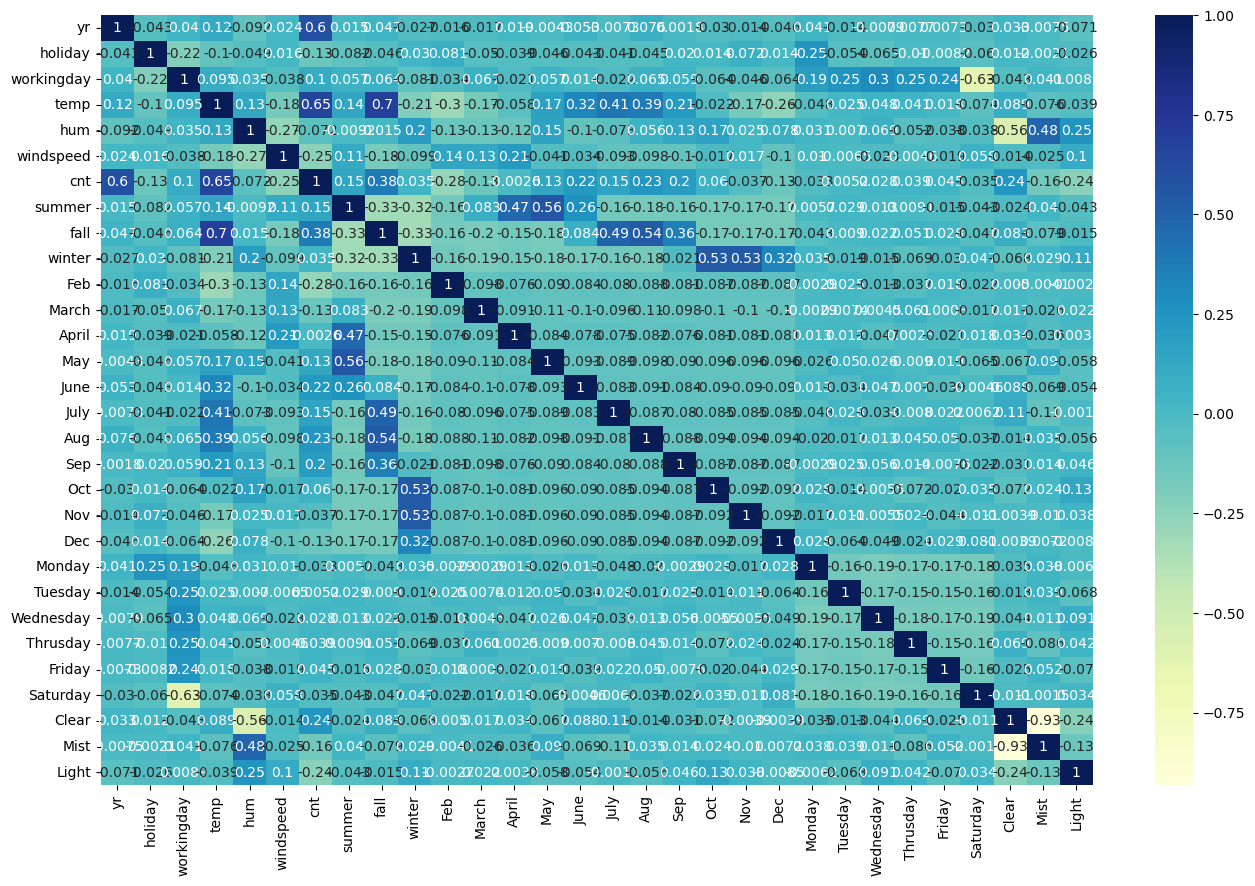

In [76]:
# heatmap
plt.figure(figsize= (16, 10))
sns.heatmap(df_train.corr(), annot= True, cmap="YlGnBu")
plt.show()

> **As we can see from the heatmap, the count seems to be heavily correlated with the temp variable. We will now observe the variance using pairplots**

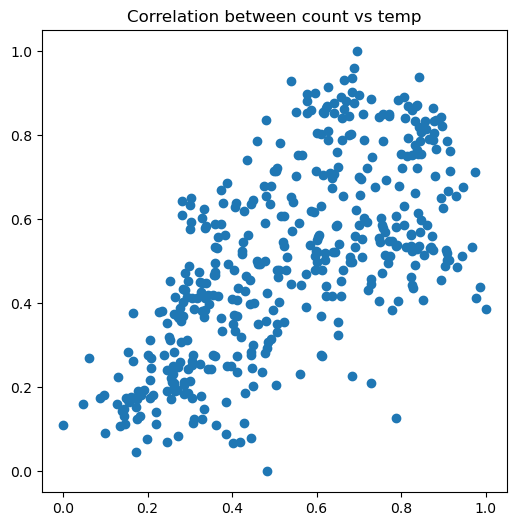

In [77]:
#checking for correlation between count and temp using a pairplot
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.title('Correlation between count vs temp')
plt.show()

In [78]:
# Preparation of Training Dataset
y_train = df_train.pop('cnt')
X_train = df_train
print(X_train.shape)
y_train.sample(5)

(438, 29)


165    0.593419
570    0.937759
330    0.350782
85     0.192246
668    0.637828
Name: cnt, dtype: float64

### Performing by using stats model

In [79]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.156953
temp     0.641128
dtype: float64

In [80]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     324.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.16e-54
Time:                        11:36:46   Log-Likelihood:                 148.46
No. Observations:                 438   AIC:                            -292.9
Df Residuals:                     436   BIC:                            -284.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.021      7.547      0.000       0.116       0.198
temp           0.6411      0.036     18.020      0.000       0.571       0.711
==============================================================================
Omnibus:                        4.271   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.352
Skew:                           0.096   Prob(JB):                        0.187
Kurtosis:                       2.617   Cond. No.                         5.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* > From the above output, the coefficient is significant based on P value which is zero.

* > That means there is a strong relationship between coeffocient and temp parameter. 

* > R-squared is .414 which means 41% of the variance in the count quantity is explained by temp

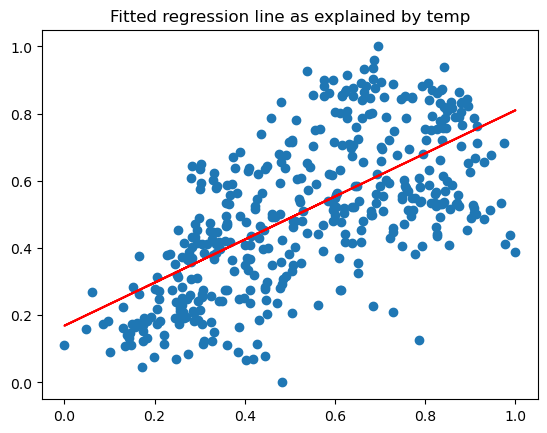

In [81]:
#visualising our data with a scatter plot and the fitted regression line to see the best fit line
plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 0.1690 + 0.6409*X_train_sm.iloc[:, 1], 'r')
plt.title('Fitted regression line as explained by temp')
plt.show()

In [82]:
#adding another variable thus performing multiple regression 
#adding variable yr and checking to see if it improves the R-squared

X_train_sm = X_train[['temp', 'yr']]
X_train_sm = sm.add_constant(X_train_sm)

#create second model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const    0.073138
temp     0.581168
yr       0.240761
dtype: float64

In [83]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     512.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.86e-115
Time:                        11:36:46   Log-Likelihood:                 291.81
No. Observations:                 438   AIC:                            -577.6
Df Residuals:                     435   BIC:                            -565.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0731      0.016      4.694      0.000       0.043       0.104
temp           0.5812      0.026     22.482      0.000       0.530       0.632
yr             0.2408      0.012     20.052      0.000       0.217       0.264
==============================================================================
Omnibus:                       33.813   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.114
Skew:                          -0.563   Prob(JB):                     2.16e-11
Kurtosis:                       4.192   Cond. No.                         6.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* > From the above output, the coefficient is still significant based on P value which is zero.

* > That means there is a strong relationship between coeffocient and temp, yr parameter. 

* > R-squared is .690 which means 69% of the variance in the count quantity is explained by temperature and year data

In [84]:
#adding all variables and finding out the R-squared values
#checking all the variables in our dataset
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'Feb', 'March', 'April', 'May', 'June',
       'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Monday', 'Tuesday',
       'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Clear', 'Mist',
       'Light'],
      dtype='object')

In [85]:
#building model with all variables
X_train_sm = sm.add_constant(X_train)

#create third model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const         0.072187
yr            0.235515
holiday      -0.042484
workingday    0.037914
temp          0.458828
hum          -0.173058
windspeed    -0.210993
summer        0.089821
fall          0.044302
winter        0.143794
Feb           0.030031
March         0.063699
April         0.057272
May           0.071268
June          0.053474
July          0.017652
Aug           0.068281
Sep           0.139215
Oct           0.076498
Nov           0.028621
Dec           0.019663
Monday       -0.012849
Tuesday      -0.014197
Wednesday     0.005519
Thrusday      0.005792
Friday        0.011166
Saturday      0.050523
Clear         0.123023
Mist          0.072492
Light        -0.123328
dtype: float64

In [86]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     93.50
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          6.38e-157
Time:                        11:36:46   Log-Likelihood:                 457.57
No. Observations:                 438   AIC:                            -859.1
Df Residuals:                     410   BIC:                            -744.8
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0722      0.028      2.537      0.012       0.016       0.128
yr             0.2355      0.009     27.191      0.000       0.218       0.253
holiday       -0.0425      0.028     -1.535      0.126      -0.097       0.012
workingday     0.0379      0.010      3.683      0.000       0.018       0.058
temp           0.4588      0.049      9.459      0.000       0.363       0.554
hum           -0.1731      0.041     -4.225      0.000      -0.254      -0.093
windspeed     -0.2110      0.027     -7.695      0.000      -0.265      -0.157
summer         0.0898      0.025      3.623      0.000       0.041       0.139
fall           0.0443      0.032      1.383      0.167      -0.019       0.107
winter         0.1438      0.028      5.129      0.000       0.089       0.199
Feb            0.0300      0.021      1.415      0.158      -0.012       0.072
March          0.0637      0.023      2.717      0.007       0.018       0.110
April          0.0573      0.036      1.591      0.112      -0.013       0.128
May            0.0713      0.038      1.857      0.064      -0.004       0.147
June           0.0535      0.041      1.295      0.196      -0.028       0.135
July           0.0177      0.047      0.375      0.708      -0.075       0.110
Aug            0.0683      0.045      1.519      0.130      -0.020       0.157
Sep            0.1392      0.040      3.469      0.001       0.060       0.218
Oct            0.0765      0.037      2.081      0.038       0.004       0.149
Nov            0.0286      0.035      0.810      0.418      -0.041       0.098
Dec            0.0197      0.028      0.691      0.490      -0.036       0.076
Monday        -0.0128      0.010     -1.228      0.220      -0.033       0.008
Tuesday       -0.0142      0.012     -1.147      0.252      -0.039       0.010
Wednesday      0.0055      0.011      0.493      0.623      -0.017       0.028
Thrusday       0.0058      0.012      0.487      0.627      -0.018       0.029
Friday         0.0112      0.012      0.931      0.352      -0.012       0.035
Saturday       0.0505      0.016      3.179      0.002       0.019       0.082
Clear          0.1230      0.009     13.320      0.000       0.105       0.141
Mist           0.0725      0.012      5.821      0.000       0.048       0.097
Light         -0.1233      0.023     -5.272      0.000      -0.169      -0.077
==============================================================================
Omnibus:                       81.183   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.475
Skew:                          -0.863   Prob(JB):                     9.97e-53
Kurtosis:                       6.185   Cond. No.                     1.03e+16
==============================================================================

N

* > R-squared is 0.860 which means 86% of the variance in the count quantity is explained with all the variables

# After doing splitting & training on data set with different splits of combination, We have got R-squared with almost same value 

## . R-squared is 0.853 which means 85% with train = 0.7 and split = 0.3
## . R-squared is 0.859 which means 85% with train = 0.8 and split = 0.2
## . R-squared is 0.860 which means 86% with train = 0.6 and split = 0.4